In [1]:
!nvidia-smi

Thu Aug 19 08:27:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 470.57.02    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P3    N/A /  N/A |    347MiB /  4042MiB |      3%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import sys
import numpy as np
import common
import tensorflow as tf
import pycuda.autoinit
import tensorrt as trt
import model_model_weights
import matplotlib.pyplot as plt

2021-08-19 08:27:00.932367: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
TRT_LOGGER = trt.Logger(trt.Logger.WARNING)

class ModelData(object):
    INPUT_NAME = "conv1"
    INPUT_SHAPE = (1, 28, 28)
#     OUTPUT_NAME = "prob"
    OUTPUT_SIZE = 10
    DTYPE = trt.float32

In [4]:
model=model_model_weights.train_mnist_conv()

2021-08-19 08:27:02.059883: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-08-19 08:27:02.060019: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-08-19 08:27:02.060249: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-08-19 08:27:02.060950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1050 Ti computeCapability: 6.1
coreClock: 1.62GHz coreCount: 6 deviceMemorySize: 3.95GiB deviceMemoryBandwidth: 104.43GiB/s
2021-08-19 08:27:02.061008: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-08-19 08:27:02.061098: I tensorflow/stream_executor/platform/d

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
fc1 (Dense)                  (None, 500)               400500    
_________________________________________________________________
fc2 (Dense)                  (None, 10)                5

2021-08-19 08:27:02.513383: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-08-19 08:27:02.530332: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2299965000 Hz


Epoch 1/10
60/60 [==============================] - 16s 271ms/step - loss: 1.0714 - accuracy: 0.7201 - val_loss: 0.1734 - val_accuracy: 0.9489
Epoch 2/10
60/60 [==============================] - 13s 213ms/step - loss: 0.1524 - accuracy: 0.9552 - val_loss: 0.0831 - val_accuracy: 0.9741
Epoch 3/10
60/60 [==============================] - 14s 231ms/step - loss: 0.0860 - accuracy: 0.9740 - val_loss: 0.0561 - val_accuracy: 0.9820
Epoch 4/10
60/60 [==============================] - 18s 306ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 5/10
60/60 [==============================] - 19s 311ms/step - loss: 0.0475 - accuracy: 0.9853 - val_loss: 0.0372 - val_accuracy: 0.9879
Epoch 6/10
60/60 [==============================] - 16s 265ms/step - loss: 0.0375 - accuracy: 0.9890 - val_loss: 0.0355 - val_accuracy: 0.9885
Epoch 7/10
60/60 [==============================] - 18s 303ms/step - loss: 0.0339 - accuracy: 0.9901 - val_loss: 0.0333 - val_accuracy: 0.9892

In [5]:
print(len(model.layers))
for i in range(len(model.layers)):
    if i!=1 and i!=3 and i!=4 and i!=7 :
#     
        print(i,"layer_weight",model.layers[i].get_weights()[0])
        print(i,"layer_bias",model.layers[i].get_weights()[1])

7
0 layer_weight [[[[ 7.89400935e-02 -1.20138261e-03  1.33459136e-01 -3.00914310e-02
     7.98339099e-02 -1.17007516e-01 -1.04835108e-02 -8.31743479e-02
     1.07835464e-01  1.09524928e-01  1.43811941e-01  4.36495058e-02
     1.72880262e-01 -9.81524587e-02  5.31539358e-02 -1.07032917e-01
     1.44847721e-01 -4.49363329e-02 -1.07279733e-01 -7.50133768e-02]]

  [[-2.75813654e-04 -6.74587041e-02  1.34424970e-01  9.73834321e-02
    -1.94194783e-02 -3.67645100e-02 -2.64614969e-02 -2.29701549e-01
     4.45113815e-02  8.61818865e-02  1.23484451e-02 -9.54616666e-02
     7.19845369e-02 -5.89863770e-02  7.75989424e-03  4.66767289e-02
     1.08782634e-01 -9.91214663e-02  9.13078263e-02  6.50354624e-02]]

  [[ 3.73311341e-02  5.30648530e-02  4.23993822e-03  5.96601225e-04
    -1.41742632e-01  3.08086779e-02  1.06448688e-01 -2.32240751e-01
     6.02459796e-02  6.04419373e-02  5.46013191e-02 -1.33395165e-01
     5.17905317e-02  6.91101104e-02 -1.13897987e-01  8.74407366e-02
     3.75840999e-02 -7.24

In [6]:
# print(len(model.layers[0].get_weights()))

In [7]:
def populate_network(network, weights):
    # Configure the network layers based on the weights provided.
    input_tensor = network.add_input(name=ModelData.INPUT_NAME, dtype=ModelData.DTYPE, shape=ModelData.INPUT_SHAPE)

    
    
    #building layer-1
#     conv1_w =weights['conv1.weight'].numpy()
    conv1_w = model.layers[0].get_weights()[0]
    conv1_b= model.layers[0].get_weights()[1]
#     print("conv1_w",conv1_w)
#     print(conv1_b.dtype,"dtype")
    
    
    conv1 = network.add_convolution_nd(input=input_tensor, num_output_maps=20, kernel_shape=(5, 5), kernel=conv1_w, bias=conv1_b)   
    conv1.stride_nd = (1, 1)    
    relu1 = network.add_activation(input=conv1.get_output(0), type=trt.ActivationType.RELU)
    
    
    pool1 = network.add_pooling_nd(relu1.get_output(0), trt.PoolingType.MAX, (2, 2))
#     pool1.stride_nd = (2, 2)
    
    
     #building layer-2
        
    conv2_w =model.layers[2].get_weights()[0]
    conv2_b = model.layers[2].get_weights()[1]
#     print(conv2_w.shape)
#     print(conv2_b.dtype,"dtype")
    
    
    conv2 = network.add_convolution_nd(input=pool1.get_output(0), num_output_maps=50,kernel_shape=(5, 5), kernel=conv2_w, bias=conv2_b)   
    conv2.stride_nd = (1, 1)   
    relu2 = network.add_activation(input=conv2.get_output(0), type=trt.ActivationType.RELU)
    
    pool2 = network.add_pooling_nd(relu2.get_output(0), trt.PoolingType.MAX, (2, 2))
#     pool2.stride_nd = (2,2)
    
    
    #building layer-3
    
    fc1_w = model.layers[5].get_weights()[0]
    fc1_b =model.layers[5].get_weights()[1]
#     print(fc1_w.shape)
#     print(fc1_b)
    
    fc1 = network.add_fully_connected(input=pool2.get_output(0), num_outputs=500, kernel=fc1_w, bias=fc1_b)
    relu3 = network.add_activation(input=fc1.get_output(0), type=trt.ActivationType.RELU)
    
    
    
    #building layer-3
    
    fc2_w = model.layers[6].get_weights()[0]
    fc2_b = model.layers[6].get_weights()[1]
#     print(fc2_w.shape)
#     print(fc2_b)
    
    fc2 = network.add_fully_connected(input=relu3.get_output(0), num_outputs=ModelData.OUTPUT_SIZE, kernel=fc2_w, bias=fc2_b)
#     fc2 = network.add_fully_connected(input= relu3.get_output(0), num_outputs=10, kernel=fc2_w, bias=fc2_b)
    SIGMOID= network.add_activation(input=fc2.get_output(0), type=trt.ActivationType.SIGMOID)
    
    
#     SIGMOID.get_output(0).name = ModelData.OUTPUT_NAME  

#     SIGMOID.get_output(0).name = "sigmoid"
    
    network.mark_output(tensor=SIGMOID.get_output(0))
       

In [8]:

def build_engine(weights):
    # For more information on TRT basics, refer to the introductory samples.
    builder = trt.Builder(TRT_LOGGER)
    network = builder.create_network()
    config = builder.create_builder_config()
    runtime = trt.Runtime(TRT_LOGGER)

    config.max_workspace_size = common.GiB(1)
    # Populate the network using weights from the PyTorch model.
    populate_network(network, weights)
    # Build and return an engine.
    plan = builder.build_serialized_network(network, config)
   
    return runtime.deserialize_cuda_engine(plan)

In [9]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
# YOUR CODE STARTS HERE
#


training_images=training_images/255
test_images=test_images/255

training_images = training_images.reshape(60000, 28, 28, 1)
#
test_images = test_images.reshape(10000, 28, 28, 1)

[TensorRT] WARNING: Detected invalid timing cache, setup a local cache instead


Prediction: 0


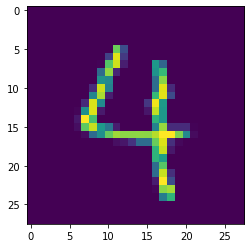

In [10]:
def main(image):

#     model=model
    weights = model.get_weights()
#     print(weights)
    # Do inference with TensorRT.
    engine = build_engine(weights)
    
    # Build an engine, allocate buffers and create a stream.
    # For more information on buffer allocation, refer to the introductory samples.
    inputs, outputs, bindings, stream = common.allocate_buffers(engine)
    context = engine.create_execution_context()
    

    plt.imshow(image)
    
    
    image = image.ravel().astype(np.float32)
    np.copyto(inputs[0].host, image)
    
    # For more information on performing inference, refer to the introductory samples.
    # The common.do_inference function will return a list of outputs - we only have one in this case.
    [output] = common.do_inference(context, bindings=bindings, inputs=inputs, outputs=outputs, stream=stream)
    pred = np.argmax(output)
    

    print("Prediction: " + str(pred))
    return engine

engine=main(test_images[24])


In [16]:
#predicting using tensorflow
test_image=np.expand_dims(test_images[24],axis=0)
prediction=model.predict(test_image)
print(prediction)
print(np.argmax(prediction))


[[0.02016503 0.03768095 0.06001979 0.18159282 0.9999929  0.13958517
  0.07655647 0.83445024 0.2642513  0.91901183]]
4
